In [1]:
pip install pyAstronomy


     |████████████████████████████████| 716kB 7.2MB/s 
  Created wheel for pyAstronomy: filename=PyAstronomy-0.16.0-cp37-none-any.whl size=504499 sha256=daef86c9819908ab0680f51207196a95542c6b3898e8f08915de83e3943c23a0
  Stored in directory: /root/.cache/pip/wheels/93/af/aa/931d34dfc98c7f7fb4514fb9da32cac3584895cc03e873bdd1
Successfully built pyAstronomy


In [2]:
pip install arviz


     |████████████████████████████████| 1.6MB 6.1MB/s 
     |████████████████████████████████| 768kB 18.7MB/s 
     |████████████████████████████████| 4.7MB 23.6MB/s 
     |████████████████████████████████| 317kB 35.2MB/s 
  Found existing installation: xarray 0.15.1
    Uninstalling xarray-0.15.1:
      Successfully uninstalled xarray-0.15.1


In [4]:
import numpy as np
import arviz as az
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow.compat.v2 as tf
import tensorflow_probability as tfp
from mpl_toolkits.mplot3d import Axes3D
from google.colab import files
import io
from PyAstronomy import pyasl
import time
r = pyasl.BallesterosBV_T()
b = pyasl.Ramirez2005()

uploaded = files.upload()

data0 = data = np.array(pd.read_csv(io.BytesIO(uploaded['Data1.csv'])))

Saving Data1.csv to Data1.csv


In [5]:
import tensorflow.math as tf_m
def mean_fn(x, y, a, b, c, d):
  return (np.exp(x)*1000)**a * b*(y - c)**d #the m relation was through trial and error
#fn from Barnes 2007
def mean_fn_hmc(x):
  e = 2.718#np.float64(np.exp(1))
  BV = (5601/10**x[:,1])**3/2 - 0.3
  return tf.convert_to_tensor((np.array(p)).reshape(L,1), dtype=np.float64)#((e**x[:,0])*1000)**0.5189 * 0.75*(BV)**0.601

In [6]:
# # mean_fn_hmc(observation_index_points)- p
# BV = (5601/10**observation_index_points[:,1])**3/2 #- 0.3
# ((2.718**observation_index_points[:,0])*1000)**0.5189 * 0.75*(BV)**0.601

In [157]:
# te = data0[:,0]
# tee= data0[:,3]
# age = data0[:,2]
# # agle = data0[:,5].tolist()
# # ague = data0[:,6].tolist()
# mass = data0[:,3]
# # massle = data0[:,8].tolist()
# # massue = data0[:,9].tolist()
# p = data0[:,1]
# # pl = data0[:,22].tolist()
# pu = data0[:,23].tolist()
data = data0
data_r = []
for num in range(0, len(data0)):
  if np.random.random_sample()< 0.1 and data0[num,2]>5:
    data_r.append(data[num])
data_r = np.array(data_r)
print(len(data_r))
data = data_r
p = data[:,1] #period
p_error = 0.1*p
te = data[:,0]#data[::al,2] #B_V
tee = 0.1*te
X3 = data[:, 3] #mass
mass = X3
age = data[:,2]
age_error = 0.2*age

mass_error = 0.2*mass#(np.array(massle) + np.array(massue))/2
age_error = 0.2*age#(np.array(agle)+np.array(ague))/2#np.log(age) - np.log(np.array(age) - np.array(agle))
p_error = 0.1*age#((np.array(pl)+np.array(pu))/2)#(np.log(p) - np.log(np.array(p)-np.array(pl)))


30


In [134]:
# indctr = data0[:,24]
# index = 0
# for i in range(0, len(p)-index):
#   if age[i]<2 or age[i]>11 or p[i]<5 or indctr[i]>1:
#     index = index+1
# for i in range(0, len(p)-index):
#   if age[i]<2 or age[i]>11 or p[i]<5 or indctr[i]>1:
#     te.pop(int(np.where(np.array(p) == float(p[i]))[0]))
#     tee.pop(int(np.where(np.array(p) == float(p[i]))[0]))
#     age.pop(int(np.where(np.array(p) == float(p[i]))[0]))
#     agle.pop(int(np.where(np.array(p) == float(p[i]))[0]))
#     ague.pop(int(np.where(np.array(p) == float(p[i]))[0]))
#     mass.pop(int(np.where(np.array(p) == float(p[i]))[0]))
#     massle.pop(int(np.where(np.array(p) == float(p[i]))[0]))
#     massue.pop(int(np.where(np.array(p) == float(p[i]))[0]))
#     p.pop(int(np.where(np.array(p) == float(p[i]))[0]))
#     pl.pop(int(np.where(np.array(p) == float(p[i]))[0]))
#     pu.pop(int(np.where(np.array(p) == float(p[i]))[0]))
    

# mass_error = (np.array(massle) + np.array(massue))/2
# age_error = (np.array(agle)+np.array(ague))/2#np.log(age) - np.log(np.array(age) - np.array(agle))
# p_error = ((np.array(pl)+np.array(pu))/2)#/np.array(p)#(np.log(p) - np.log(np.array(p)-np.array(pl)))

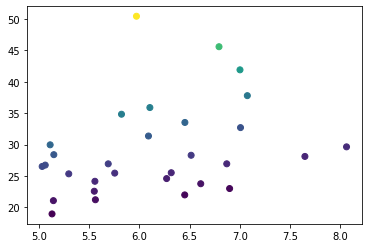

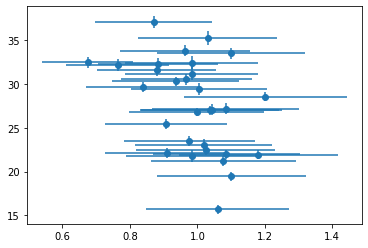

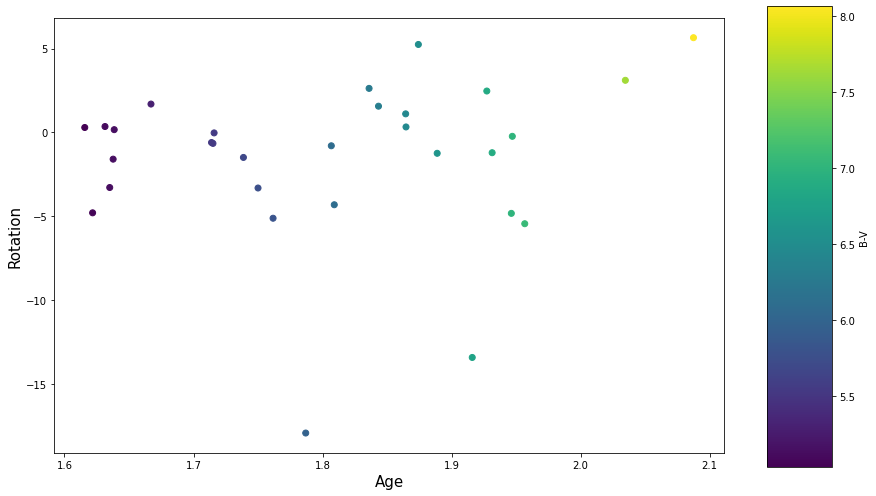

In [158]:
# data = np.array([te, p, age, mass]).T
a = 0.5189
b=0.75
c=0.4
d=0.601
f = -0.6
X1 = np.log(data[:,2]) #age
X2 = r.t2bv(data[:,0])#data[::al,2] #B_V
X3 = data[:, 3] #mass
x = mean_fn(X1, X2, a, b, c, d)
plt.scatter(data[:,2], x, c=X2, cmap='viridis')
plt.show()
plt.errorbar(X3, p, xerr=mass_error, yerr=p_error, fmt='o')#, c=X2, cmap='hsv')
subtract = data[:,1]-x
plt.show()
fig = plt.figure(figsize=(12, 8))
plt.scatter(X1, subtract, c=data[:,2], cmap='viridis')
plt.xlabel('Age', size=15)
plt.ylabel('Rotation', size=15)
#plt.subplots_adjust(bottom=np.min(X2), top=np.max(X2))
cax = plt.axes([0.95, 0.1, 0.075, 0.8])
plt.colorbar(cax=cax, label='B-V')
plt.show()


In [159]:
age = age.tolist()
p = p.tolist()
te = te.tolist()
# tee = tee.tolist()
# p_error = p_error.tolist()
# age_error = age_error.tolist()

In [160]:
L = len(p)

In [161]:
tf.enable_v2_behavior()
t1 = time.perf_counter()

tfb = tfp.bijectors
tfd = tfp.distributions
psd_kernels = tfp.math.psd_kernels

# observations from a known function at some random points.
X1 = np.log(age).reshape(1,L) #age
X2 = np.log10(te)#data[::al,2] #B_V
X3 = np.array(mass)
observation_index_points = X1#np.dstack([X1])#.reshape(-1)
shape = np.array(observation_index_points.shape)
observation_index_error = np.array(age_error/age)#.reshape(-1)#, 0.43*np.array(tee)/np.array(te)]).reshape(L, 2)
shape = np.array(observation_index_points.shape)
resolution = len(X2)
X1_test = np.log(np.linspace( np.min(data[::,2]), np.max(data[::,2]), num=resolution ))
X2_test = np.linspace( np.min(X2), np.max(X2), num=resolution )
X3_test = np.linspace( np.min(X3), np.max(X3), num=resolution )
X_test = np.dstack([X1_test, X2_test]).reshape(resolution,2)# resolution, resolution, 3)

a = 0.5189
b=0.75
c=0.4
d=0.601

Y = observations = (np.array(p) - mean_fn(X1, r.t2bv(np.array(te)), a, b, c, d))
noise_variance = p_error**0.5

sigma_init = 2#(max(Y) - min(Y))**0.5
l_scale = max(X2) - min(X2)
gaussian_process_model = tfd.JointDistributionSequential([
  tfd.LogNormal(sigma_init*np.ones(shape), np.float64(.0001)),
  tfd.LogNormal(l_scale*np.ones(shape), np.float64(.0001)),
  tfd.Normal(observation_index_points, observation_index_error),
  # tfd.Normal(X2.reshape(-1), 0.04*X1.reshape(-1)),
  # tfd.Normal(X3.reshape(-1), 0.04*X1.reshape(-1)),
  lambda amplitude, length_scale, observations1_: tfd.GaussianProcess(
      kernel=psd_kernels.ExponentiatedQuadratic(amplitude, length_scale),# mean_fn=mean_fn_hmc,
      index_points=observations1_, observation_noise_variance=observation_index_error)])

initial_chain_states = [
    sigma_init * tf.ones(shape, dtype=np.float64, name='init_amplitude'),
    l_scale * tf.ones(shape, dtype=np.float64, name='init_length_scale'),
    tf.convert_to_tensor(observation_index_points, dtype=np.float64, name='observations1_')]
    # tf.convert_to_tensor(X2.reshape(-1), dtype=np.float64, name='observations2_'),
    # tf.convert_to_tensor(X3.reshape(-1), dtype=np.float64, name='observations3_')]

unconstraining_bijectors = [
    tfp.bijectors.Softplus(),
    tfp.bijectors.Softplus(),
    # tfp.bijectors.Softplus(),
    tfp.bijectors.Softplus()]

initial_steps = [
    5e-6* tf.ones(shape, dtype=np.float64),
    5e-6* tf.ones(shape, dtype=np.float64),
    tf.convert_to_tensor(observation_index_error, dtype=np.float64)]

def unnormalized_log_posterior(*args):
  return gaussian_process_model.log_prob(*args, x=observations)

num_results = 50
num_burnin_steps = 100
@tf.function
# def run_mcmc():
#   return tfp.mcmc.sample_chain(
#       num_results=num_results,
#       num_burnin_steps=num_burnin_steps,
#       num_steps_between_results=3,
#       current_state=initial_chain_states,
#       kernel=tfp.mcmc.SimpleStepSizeAdaptation(
#           inner_kernel = tfp.mcmc.HamiltonianMonteCarlo(
#               target_log_prob_fn=unnormalized_log_posterior,
#               step_size=[np.float64(1)],
#               num_leapfrog_steps=4), 
#               num_adaptation_steps=int(num_burnin_steps)),
#       trace_fn=lambda _, pkr: pkr.inner_results.is_accepted)
def run_mcmc():
  return tfp.mcmc.sample_chain(
      num_results=num_results,
      num_burnin_steps=num_burnin_steps,
      num_steps_between_results=3,
      current_state=initial_chain_states,
      kernel = tfp.mcmc.NoUTurnSampler( 
              target_log_prob_fn=unnormalized_log_posterior,
              step_size=initial_steps,
              unrolled_leapfrog_steps=4, parallel_iterations=2))
[
      amplitudes,
      length_scales,
      observations1_#, observations2_,observations3_
], is_accepted = run_mcmc()

observation_index_points_1 = np.mean(observations1_,axis=0)
p = np.array(p).reshape(-1)
noise_variance = 0.1*p
gp = tfd.GaussianProcessRegressionModel(
    kernel=psd_kernels.ExponentiatedQuadratic(np.mean(amplitudes), np.mean(length_scales)),
    index_points=X1_test.reshape(L,1),
    observation_index_points=observation_index_points_1.reshape(L,1),
    observations = p,
    observation_noise_variance=noise_variance, predictive_noise_variance = 0.9*noise_variance)

#print("Final NLL = {}".format(neg_log_likelihood_))

samples = gp.sample(10).numpy()
var = np.array(gp.variance())
# ==> 10 independently drawn, joint samples at `index_points`.
# ==> 10 independently drawn, noisy joint samples at `index_points`
t2 = time.perf_counter()
print()


/usr/local/lib/python3.7/dist-packages/tensorflow_probability/python/mcmc/sample.py:341: UserWarning: Tracing all kernel results by default is deprecated. Set the `trace_fn` argument to None (the future default value) or an explicit callback that traces the values you are interested in.
  warnings.warn('Tracing all kernel results by default is deprecated. Set '


/usr/local/lib/python3.7/dist-packages/arviz/plots/plot_utils.py:496: UserWarning: rcParams['plot.max_subplots'] (40) is smaller than the number of variables to plot (60) in plot_autocorr, generating only 40 plots
  UserWarning,


'\n, var_names=("amplitudes",\n      "length_scales",\n      "observation_noise_variances"))'

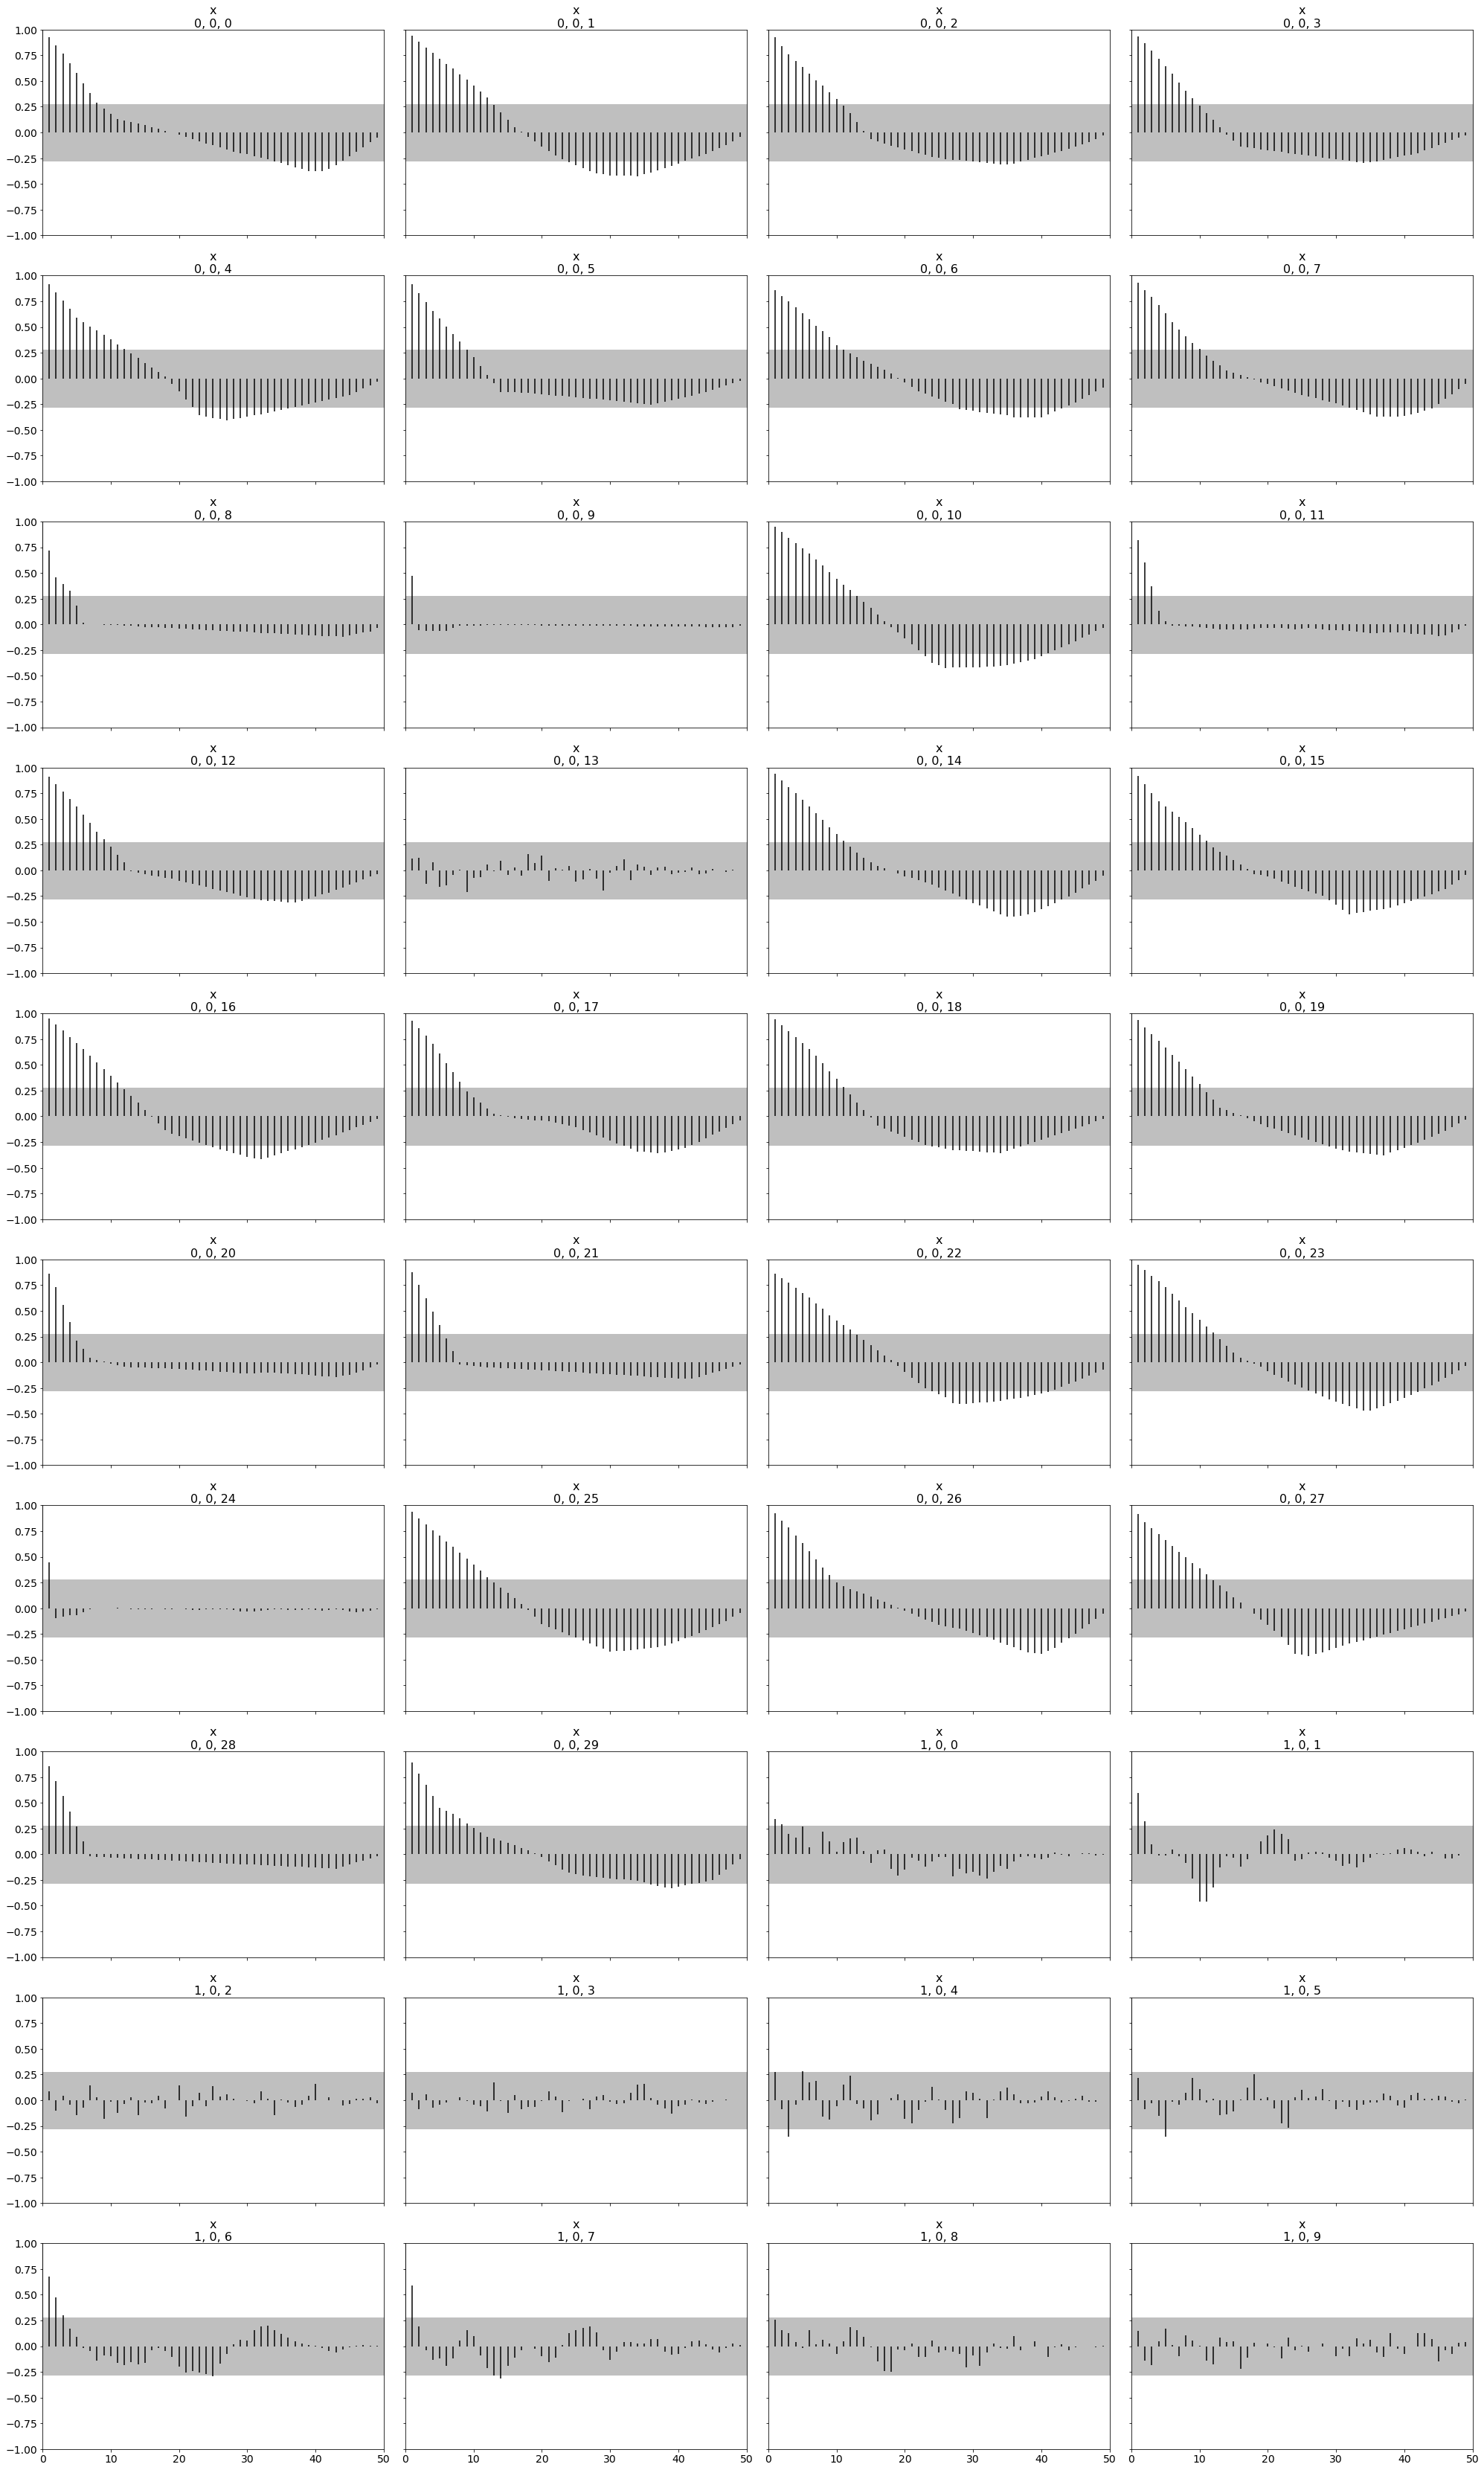

In [162]:
var1 = np.array([
      amplitudes,
      length_scales,])
az.plot_autocorr(var1)
'''
, var_names=("amplitudes",
      "length_scales",
      "observation_noise_variances"))'''

In [163]:
numElems = len(p)
sample = samples[0] #+ mean_fn(np.exp(observation_index_points_1), r.t2bv(10**(np.array(X2))), a ,b ,c ,d)
idx = np.round(np.linspace(0, len(np.array(sample).reshape(numElems**2)) - 1, numElems)).astype(int)
# Picks equal spaced elements from (longer) prediction array so that its shape of data

mu_test = (np.array(sample).reshape(numElems**2)[idx])
sd_test = (np.array(var).reshape(numElems**2)[idx]) 

vals = np.sort([mu_test, sd_test], axis=1)



(array([0.15115054, 0.        , 0.        , 0.15115054, 0.45345163,
        0.15115054, 0.30230109, 0.15115054, 0.        , 0.        ,
        0.45345163, 0.45345163, 0.30230109, 0.30230109, 0.30230109,
        0.45345163, 0.30230109, 0.30230109, 0.15115054, 0.15115054]),
 array([1.74698456, 1.96751525, 2.18804593, 2.40857662, 2.62910731,
        2.849638  , 3.07016868, 3.29069937, 3.51123006, 3.73176075,
        3.95229143, 4.17282212, 4.39335281, 4.6138835 , 4.83441418,
        5.05494487, 5.27547556, 5.49600625, 5.71653693, 5.93706762,
        6.15759831]),
 <a list of 20 Patch objects>)

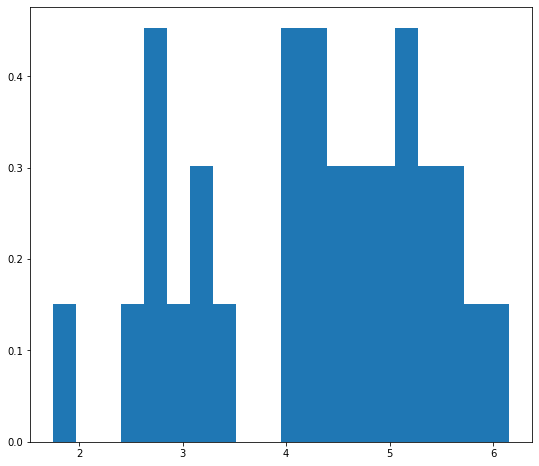

In [164]:
per_error = 100*(np.sort(noise_variance) - vals[1])/np.sort(noise_variance)
plt.figure(figsize=(9,8))
plt.hist(per_error, density=True, bins=20)

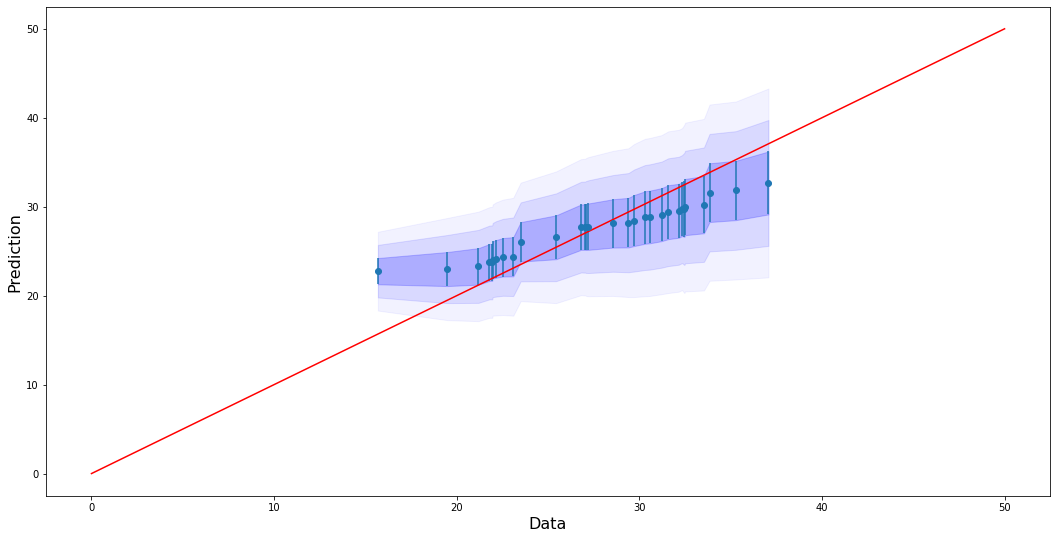

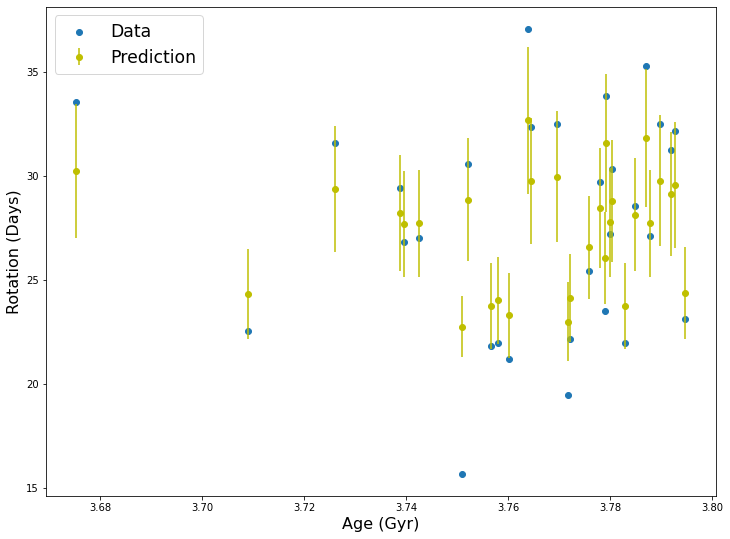

In [165]:
plt.figure(figsize=(18,9))
x = np.linspace(0, 50)
font = {'size': 16,
        }
#plt.errorbar(np.sort(data[::al, 1]), vals[0,:], yerr=vals[1,:]**0.5, fmt='bo')
plt.fill_between(np.sort(p), vals[0,:] - vals[1,:], vals[0,:] + vals[1,:], color='blue', alpha=0.2)
plt.fill_between(np.sort(p), vals[0,:] - 2*vals[1,:], vals[0,:] + 2*vals[1,:], color='blue', alpha=0.1)
plt.fill_between(np.sort(p), vals[0,:] - 3*vals[1,:], vals[0,:] + 3*vals[1,:], color='blue', alpha=0.05)

plt.errorbar(np.sort(p), np.sort(mu_test), yerr=vals[1,:], fmt='o')
plt.plot(x, x , 'r')
plt.xlabel('Data', fontdict=font)
plt.ylabel('Prediction', fontdict=font)

plt.figure(figsize=(12,9))
plt.errorbar(X2, np.sort(vals[0]), yerr=vals[1], fmt='o', c='y', label='Prediction')
plt.scatter(X2, np.sort(p), label='Data')
plt.xlabel('Age (Gyr)', fontdict=font)
plt.ylabel('Rotation (Days)', fontdict=font)
plt.legend(fontsize='xx-large')


(1, 30)


Text(0, 0.5, 'Frequency')

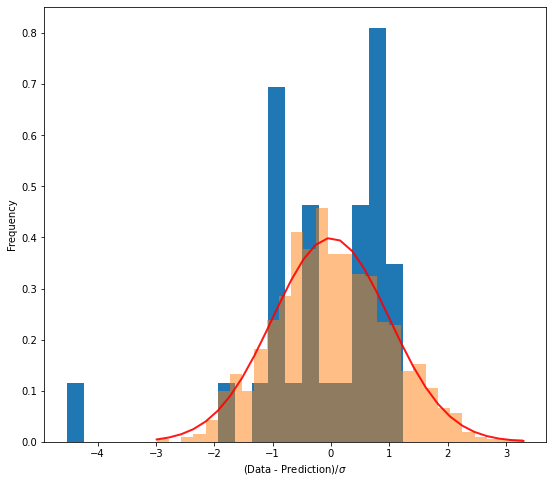

In [166]:
Z = (np.sort(p)-vals[0,:])/(vals[1,:]**2 +p_error**2)**0.5
print(Y.shape)
plt.figure(figsize=(9,8))
plt.hist(Z, density=True, bins=20)
mu, sigma = 0, 1 # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)
count, bins, ignored = plt.hist(s, 30, density=True, alpha=0.5)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r', alpha=0.9)
plt.xlabel('(Data - Prediction)/$\sigma$')
plt.ylabel('Frequency')

(1, 138)


Text(0, 0.5, 'Frequency')

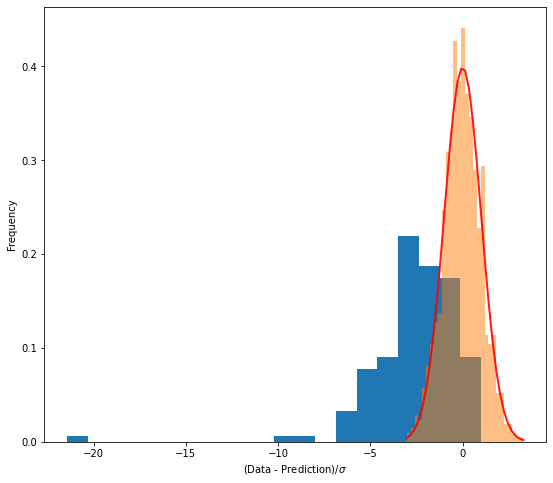

In [130]:
Z = (np.sort(p)-vals[0,:])/vals[1,:]
print(Y.shape)
# for i in range(0,len(Z)-1):
#   if Z[i]>5:
#     x = Z.tolist()
#     x.pop(i)
#     Z = np.array(x)
plt.figure(figsize=(9,8))
plt.hist(Z, density=True, bins=20)
mu, sigma = 0, 1 # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)
count, bins, ignored = plt.hist(s, 30, density=True, alpha=0.5)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r', alpha=0.9)
#plt.xlim((-5,5))
plt.xlabel('(Data - Prediction)/$\sigma$')
plt.ylabel('Frequency')

In [ ]:
print(max(x))

In [131]:
import collections 
PooledModel = collections.namedtuple('PooledModel', ['Amplitude1','Length_Scale1', 'Obs'])
samplesN = [
      amplitudes,
      length_scales,
      observations1_
]
pooled_samples = PooledModel._make(samplesN)

In [132]:
for var2, var_samples in pooled_samples._asdict().items():
  print('R-hat for ', var2, ':\t',
        tfp.mcmc.potential_scale_reduction(var_samples).numpy())

R-hat for  Amplitude1 :	 [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan]
R-hat for  Length_Scale1 :	 [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan 

/usr/local/lib/python3.7/dist-packages/tensorflow_probability/python/mcmc/diagnostic.py:602: RuntimeWarning: divide by zero encountered in true_divide
  return (n / (n - 1.)) * biased_var


In [77]:
import seaborn as sns
def plot_traces(var_name, samples, num_chains):
  if isinstance(samples, tf.Tensor):
    samples = samples.numpy() # convert to numpy array
  fig, axes = plt.subplots(1, 2, figsize=(14, 1.5), sharex='col', sharey='col')
  for chain in range(num_chains):
    axes[0].plot(samples[:, chain], alpha=0.7)
    axes[0].title.set_text("'{}' trace".format(var_name))
    sns.kdeplot(samples[:, chain], ax=axes[1], shade=False)
    axes[1].title.set_text("'{}' distribution".format(var_name))
    axes[0].set_xlabel('Iteration')
    axes[1].set_xlabel(var_name)
  plt.show()

ValueError: ignored

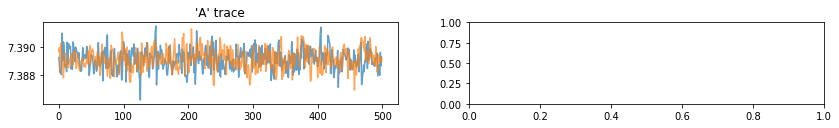

In [82]:
for var1, var_samples in pooled_samples._asdict().items():
  plot_traces(var1, samples=var_samples, num_chains=2)